In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install prophet


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from prophet import Prophet

import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_train = pd.read_csv("DailyDelhiClimateTrain.csv")
df = df_train
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [6]:
df_test.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


**Univariate: Time Series Forecasting**


In [7]:
df_train = df_train.rename(columns={'meantemp' : 'y','date':'ds'})
df_train['y_original'] = df_train['y']
df_train['y'] = np.log(df_train['y'])

In [8]:
model = Prophet()
model.fit(df_train)

16:13:34 - cmdstanpy - INFO - Chain [1] start processing
16:13:34 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

future_data = model.make_future_dataframe(periods=113,freq= 'D')
forecast_data = model.predict(future_data)
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)


,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.551835,3.425545,3.671781
1571,2017-04-21,3.555606,3.426401,3.679838
1572,2017-04-22,3.555885,3.440720,3.687558
1573,2017-04-23,3.555255,3.424076,3.672993
1574,2017-04-24,3.572521,3.448969,3.697761


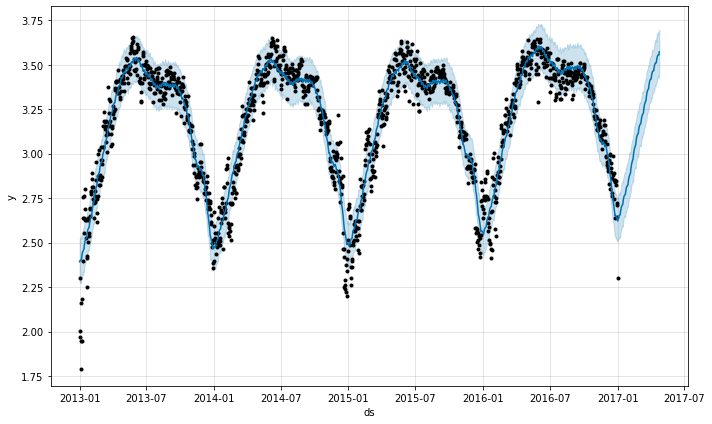

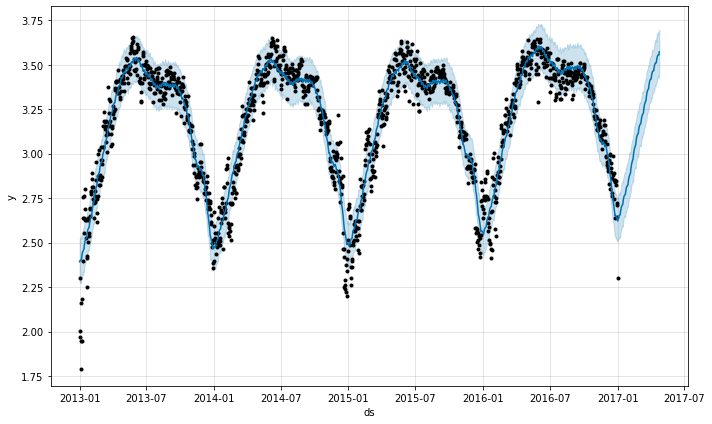

In [10]:
model.plot(forecast_data)

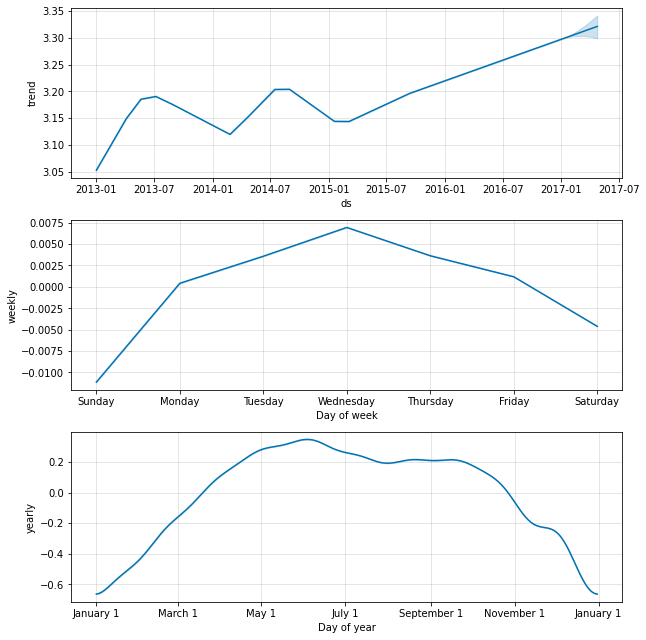

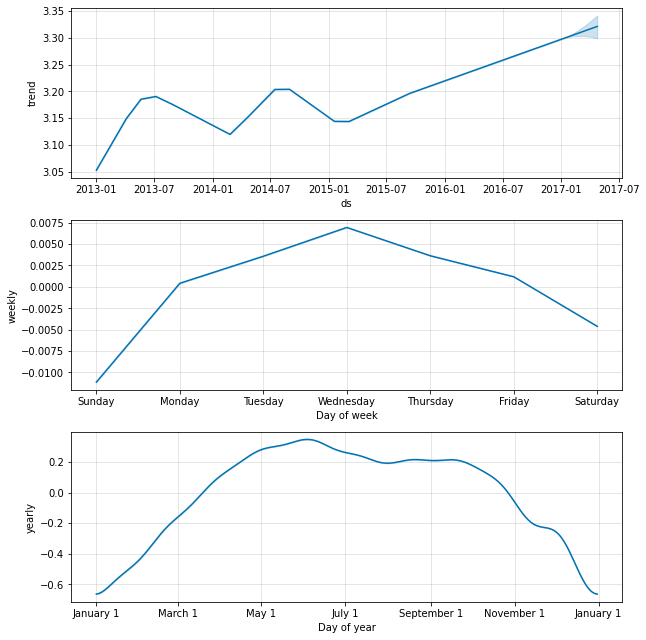

In [11]:
model.plot_components(forecast_data)

In [12]:
# Convert the logarithmic data into original format data use np.exp

forecast_data_original = forecast_data
forecast_data_original['yhat'] = np.exp(forecast_data_original['yhat'])
forecast_data_original['yhat_lower'] = np.exp(forecast_data_original['yhat_lower'])
forecast_data_original['yhat_upper'] = np.exp(forecast_data_original['yhat_upper'])


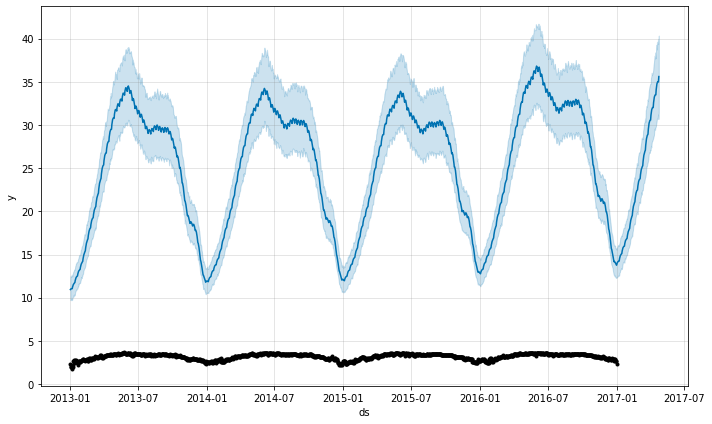

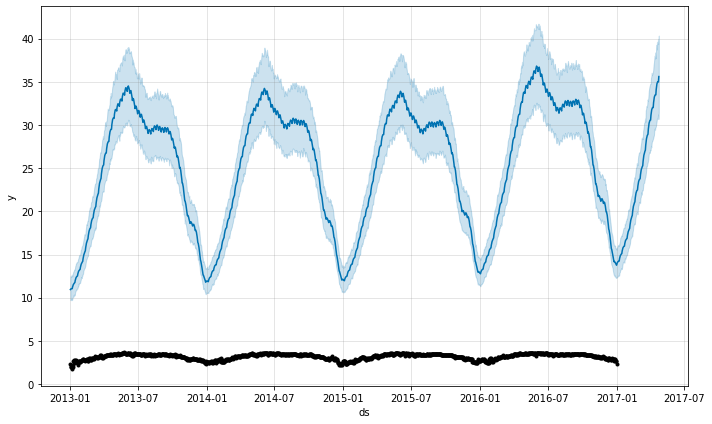

In [13]:
model.plot(forecast_data_original)

In [14]:
df_train['y_log'] = df_train['y']
df_train['y'] = df_train['y_original']


In [15]:
final_df = pd.DataFrame(forecast_data_original)

actual_chart = go.Scatter(y=df_train['y_original'],name = 'Actual')
predict_chart = go.Scatter(y=final_df['yhat'],name='Predicted')
predict_chart_upper = go.Scatter(y = final_df['yhat_upper'], name='Predicted_upper')
predict_chart_lower = go.Scatter(y= final_df['yhat_lower'],name='Predicted_lower')

py.plot([actual_chart,predict_chart,predict_chart_upper,predict_chart_lower])


'temp-plot.html'

In [16]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [17]:
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2017-01-02,3.297284,12.389425,15.707125,3.297284,3.297284,-0.662169,-0.662169,-0.662169,0.000418,0.000418,0.000418,-0.662587,-0.662587,-0.662587,0.0,0.0,0.0,13.944916
1463,2017-01-03,3.297496,12.426390,15.897293,3.297496,3.297496,-0.656148,-0.656148,-0.656148,0.003584,0.003584,0.003584,-0.659731,-0.659731,-0.659731,0.0,0.0,0.0,14.032107
1464,2017-01-04,3.297707,12.427641,16.019669,3.297707,3.297707,-0.648797,-0.648797,-0.648797,0.006953,0.006953,0.006953,-0.655750,-0.655750,-0.655750,0.0,0.0,0.0,14.138628
1465,2017-01-05,3.297919,12.569643,16.093219,3.297919,3.297919,-0.647129,-0.647129,-0.647129,0.003641,0.003641,0.003641,-0.650769,-0.650769,-0.650769,0.0,0.0,0.0,14.165232
1466,2017-01-06,3.298131,12.541920,15.965975,3.298131,3.298131,-0.643742,-0.643742,-0.643742,0.001182,0.001182,0.001182,-0.644924,-0.644924,-0.644924,0.0,0.0,0.0,14.216301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.320157,30.739399,39.321868,3.299561,3.339499,0.231678,0.231678,0.231678,0.003641,0.003641,0.003641,0.228037,0.228037,0.228037,0.0,0.0,0.0,34.877245
1571,2017-04-21,3.320369,30.765730,39.639979,3.299263,3.339960,0.235237,0.235237,0.235237,0.001182,0.001182,0.001182,0.234055,0.234055,0.234055,0.0,0.0,0.0,35.009022
1572,2017-04-22,3.320581,31.209407,39.947197,3.299188,3.340421,0.235305,0.235305,0.235305,-0.004622,-0.004622,-0.004622,0.239927,0.239927,0.239927,0.0,0.0,0.0,35.018814
1573,2017-04-23,3.320792,30.694258,39.369555,3.299027,3.340881,0.234463,0.234463,0.234463,-0.011156,-0.011156,-0.011156,0.245619,0.245619,0.245619,0.0,0.0,0.0,34.996760


In [18]:
rows = final_df['yhat'].tail(113)

In [19]:
rows = rows.reset_index()

In [20]:
rows.pop('index')

0      1462
1      1463
2      1464
3      1465
4      1466
       ... 
108    1570
109    1571
110    1572
111    1573
112    1574
Name: index, Length: 113, dtype: int64

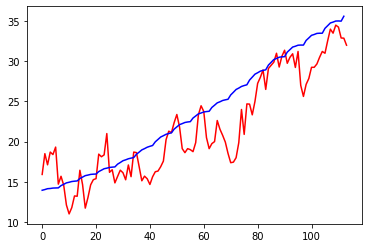

In [21]:
plt.plot(df_test['meantemp'],color = 'red')
plt.plot(rows,color='blue')
plt.show()

**Multivariate Time Series Forecasting**

In [22]:
new_model = Prophet()
new_model.add_regressor('humidity')
new_model.add_regressor('wind_speed')
new_model.add_regressor('meanpressure')


''' 'year': 'A',

        'quarter': 'Q',
        
        'month': 'M',
        
        'day': 'D',
       
        'hour': 'H',
        
        'minute': 'T',
        
        'second': 'S',
        
        'millisecond': 'L',
        
        'microsecond': 'U',
        
        'nanosecond': 'N'}
'''

In [23]:
new_model.fit(df_train)
future_data = new_model.make_future_dataframe(periods=113,freq='D')


16:13:39 - cmdstanpy - INFO - Chain [1] start processing
16:13:39 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [25]:
print(df.index.duplicated().any())
print(df_test.index.duplicated().any())


False
False


In [26]:
df = df.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
df_test = df_test.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')


In [27]:

df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'humidity', 'wind_speed', 'meanpressure']]

In [28]:
future_data.head(5)

,ds,humidity,wind_speed,meanpressure
index,,,,
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [29]:
forecast_data = new_model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1457,2016-12-28,15.708702,13.638794,17.901497
1458,2016-12-29,12.977995,10.959794,14.998815
1459,2016-12-30,12.823000,10.783430,14.724385
1460,2016-12-31,13.221732,11.197539,15.310604
1461,2017-01-01,11.820458,9.730872,13.786126


In [30]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,23.951638,8.468211,12.574480,23.951638,23.951638,-13.502999,-13.502999,-13.502999,-2.668431,...,0.305100,0.305100,0.305100,-10.848035,-10.848035,-10.848035,0.0,0.0,0.0,10.448639
1,2013-01-02,23.958654,7.396075,11.441413,23.958654,23.958654,-14.457757,-14.457757,-14.457757,-3.742065,...,0.171438,0.171438,0.171438,-10.776345,-10.776345,-10.776345,0.0,0.0,0.0,9.500896
2,2013-01-03,23.965669,7.852066,12.115254,23.965669,23.965669,-13.945759,-13.945759,-13.945759,-3.189917,...,0.097281,0.097281,0.097281,-10.688902,-10.688902,-10.688902,0.0,0.0,0.0,10.019910
3,2013-01-04,23.972684,10.265266,14.556879,23.972684,23.972684,-11.659355,-11.659355,-11.659355,-1.074361,...,0.249781,0.249781,0.249781,-10.588448,-10.588448,-10.588448,0.0,0.0,0.0,12.313329
4,2013-01-05,23.979700,8.341147,12.766362,23.979700,23.979700,-13.525300,-13.525300,-13.525300,-3.126849,...,0.139144,0.139144,0.139144,-10.477861,-10.477861,-10.477861,0.0,0.0,0.0,10.454400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2016-12-28,27.345005,13.638794,17.901497,27.345005,27.345005,-11.636302,-11.636302,-11.636302,-0.765758,...,0.145969,0.145969,0.145969,-10.931197,-10.931197,-10.931197,0.0,0.0,0.0,15.708702
1458,2016-12-29,27.348012,10.959794,14.998815,27.348012,27.348012,-14.370017,-14.370017,-14.370017,-3.358341,...,0.035982,0.035982,0.035982,-10.944735,-10.944735,-10.944735,0.0,0.0,0.0,12.977995
1459,2016-12-30,27.351019,10.783430,14.724385,27.351019,27.351019,-14.528019,-14.528019,-14.528019,-3.597162,...,0.024021,0.024021,0.024021,-10.934311,-10.934311,-10.934311,0.0,0.0,0.0,12.823000
1460,2016-12-31,27.354026,11.197539,15.310604,27.354026,27.354026,-14.132293,-14.132293,-14.132293,-3.310262,...,-0.023449,-0.023449,-0.023449,-10.901441,-10.901441,-10.901441,0.0,0.0,0.0,13.221732


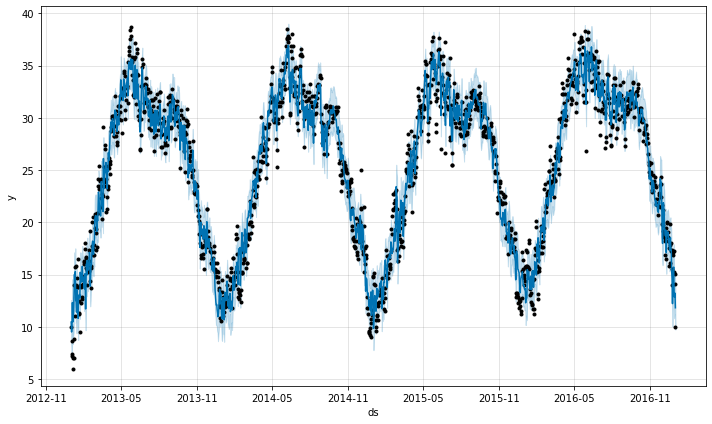

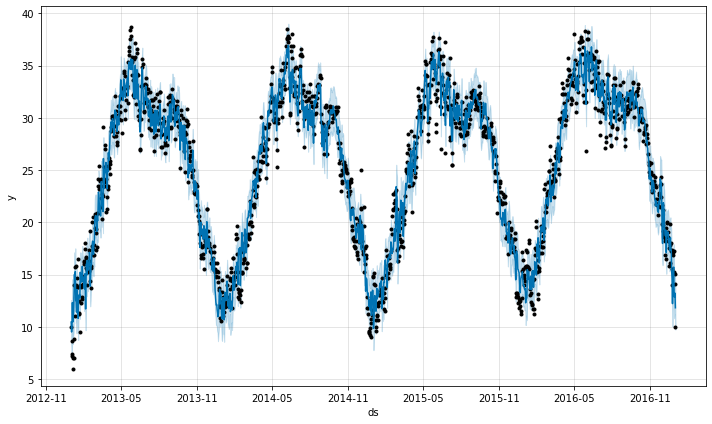

In [31]:
new_model.plot(forecast_data)

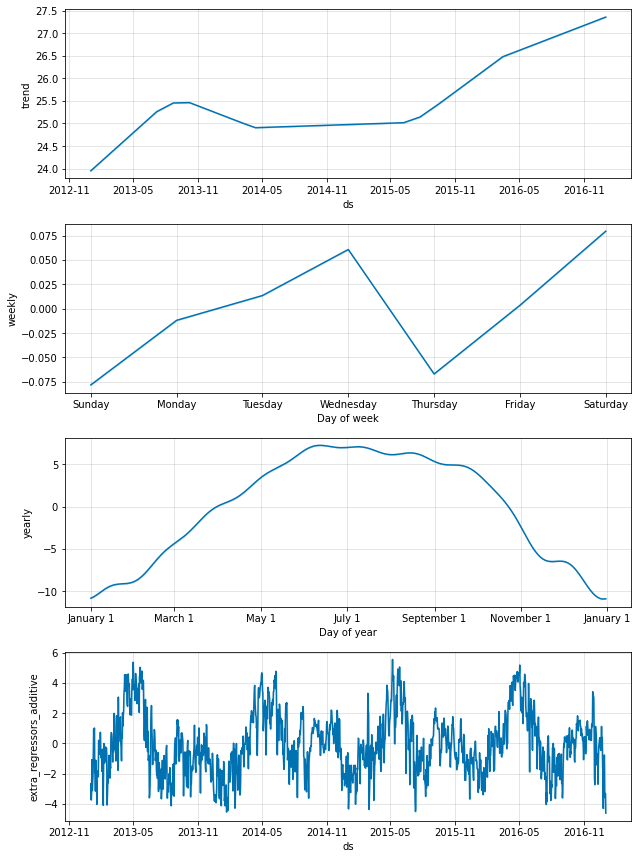

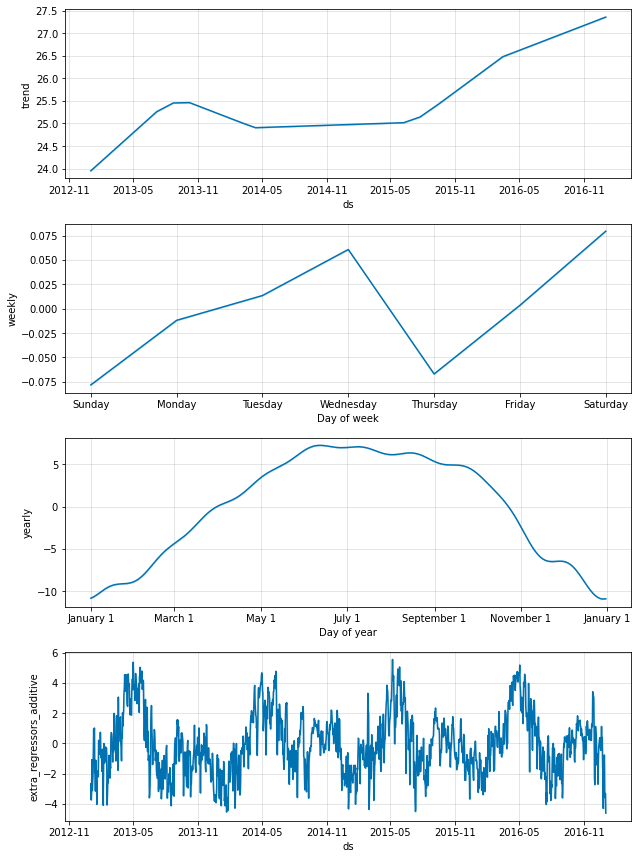

In [32]:
new_model.plot_components(forecast_data)

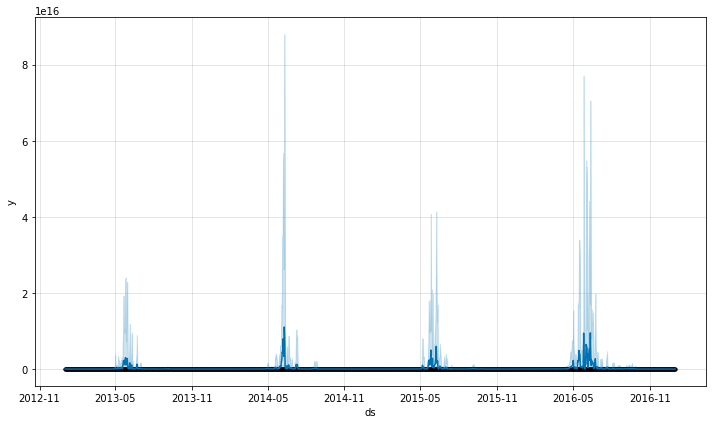

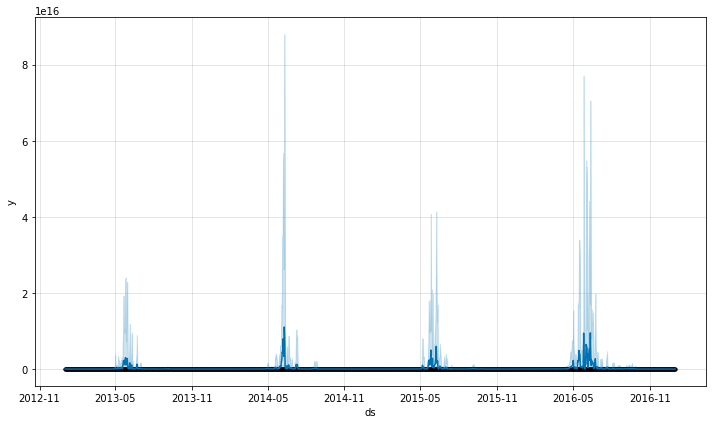

In [33]:
forecast_data_original = forecast_data # make sure we save the original forecast data
forecast_data_original['yhat'] = np.exp(forecast_data_original['yhat'])
forecast_data_original['yhat_lower'] = np.exp(forecast_data_original['yhat_lower'])
forecast_data_original['yhat_upper'] = np.exp(forecast_data_original['yhat_upper'])

new_model.plot(forecast_data_original)

In [34]:
final_df = pd.DataFrame(forecast_data_original)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_original"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'